In [51]:
# Load the Pandas library to read experimental data from the Marionette paper [1]
import pandas as pd
# Import pacti PolyhedralContract class to read contracts
from pacti.terms.polyhedra import PolyhedralContract
from pacti.iocontract.iocontract import Var
from pacti.terms.polyhedra import plot_guarantees
# Import utility functions for this case study
from utils.synbio_utils import display_sensor_contracts, remove_quantization_errors
# Import pacti PolyhedralContract parent for operations on guarantees
import pacti.terms.polyhedra as gtp
# Import pacti function to write contracts to a file
from pacti import write_contracts_to_file
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Import seaborn for heatmap plotting
import seaborn as sns
# Import Python symbolic computation library: sympy
import sympy
# Import Python numpy
import numpy as np
# Import IO library to write files
import io
# Import random library to generate random numbers
import random
# Import seaborn for heatmaps
import seaborn as sn 

In [52]:
# Read the data from the paper using the CSV file "marionette_data.csv"
df = pd.read_csv("data/marionette_data.csv", delimiter=",", engine="python")

# Add the new "std" column with random values between 0.1 and 0.3
df['std'] = np.random.uniform(0.7, 0.8, len(df))

# Write the updated DataFrame to a new CSV file
df.to_csv('data/marionette_data_with_std.csv', index=False)

In [144]:
# RSI_df = pd.read_csv("Dat_for_Ayush/RSI I2.csv")
LuxB_df = pd.read_csv("Dat_for_Ayush/LuxB_complex.csv")
PhiF_df = pd.read_csv("Dat_for_Ayush/PhiF_complex.csv")
VanCC_df = pd.read_csv("Dat_for_Ayush/VanCC_complex.csv")

In [145]:
# Use first column as index values for a new df and the head values as the columns. call the index name "IPTG" and the columns name "OHC14"
LuxB_df = LuxB_df.set_index(LuxB_df.columns[0]).T
LuxB_df.index.name = 'OHC14'
LuxB_df.columns.name = 'IPTG'
# Now do the same for PhiF and VanCC
PhiF_df = PhiF_df.set_index(PhiF_df.columns[0]).T
PhiF_df.index.name = 'OHC14'
PhiF_df.columns.name = 'IPTG'

VanCC_df = VanCC_df.set_index(VanCC_df.columns[0]).T
VanCC_df.index.name = 'OHC14'
VanCC_df.columns.name = 'IPTG'


In [54]:
import pandas as pd

# Create the data as a list of lists
RSI_data = [
    [1529.300379, 1594.680904, 1570.411433, 1630.207295, 1633.438872],
    [1676.780676, 1675.305695, 1711.141951, 1756.74995, 1924.16018],
    [1700.588085, 1696.271817, 1755.600414, 2016.412214, 5123.377631],
    [1741.275334, 2004.426161, 2515.260613, 9370.224276, 9997.122302],
    [2114.251447, 8410.291272, 9730.160544, 10924.8585, 10473.20823]
]
IPTG_vals = [0, 20, 200, 1000, 2000]

OHC14_vals = [0, 20, 200, 1000, 2000]
# Create the DataFrame
RSI_df = pd.DataFrame(RSI_data, index=IPTG_vals, columns=OHC14_vals)

# Assign index and columns names
RSI_df.index.name = "IPTG"
RSI_df.columns.name = "OHC14"


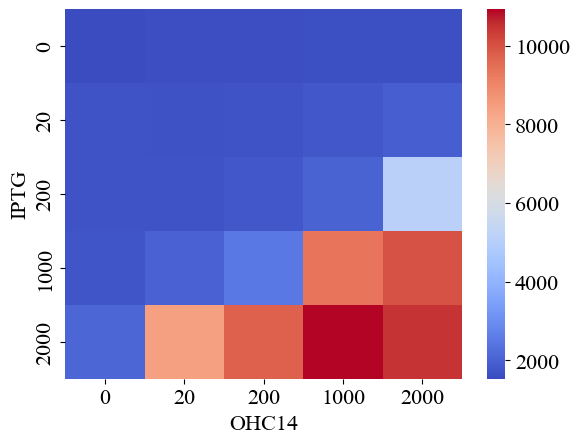

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Times New Roman'
ax = sns.heatmap(RSI_df, cmap="coolwarm")

# Set x-axis and y-axis label properties
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.set_xlabel('OHC14', fontsize=16)
ax.set_ylabel('IPTG', fontsize=16)

colorbar = ax.collections[0].colorbar
# colorbar.set_label('GFP', fontsize=16, fontname="Times New Roman")

# Set colorbar ticklabel size and fontname
colorbar.ax.tick_params(labelsize=16)
# for l in colorbar.ax.yaxis.get_ticklabels():
#     l.set_family("Times New Roman")

plt.savefig("RSI_AND_data.svg")

In [56]:
IPTG_vals = np.array([0, 20, 200, 1000, 2000])

OHC14_vals = 1e-3*np.array([0, 20, 200, 1000, 2000])

In [57]:
OHC14_vals

array([0.  , 0.02, 0.2 , 1.  , 2.  ])

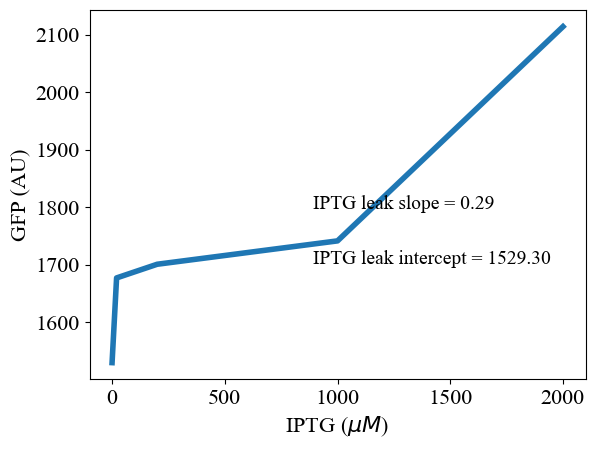

In [58]:
ax = plt.axes()
GFP_leak_IPTG = np.array(RSI_df.loc[:, RSI_df.columns[0]])
ax.plot(IPTG_vals, GFP_leak_IPTG, lw=4)
iptg_leak_slope = (GFP_leak_IPTG[0] - GFP_leak_IPTG[-1]) / (IPTG_vals[0] - IPTG_vals[-1])
iptg_leak_intercept = GFP_leak_IPTG[0] - iptg_leak_slope * IPTG_vals[0]
ax.annotate(f"IPTG leak slope = {iptg_leak_slope:.2f}", xy=(0.45, 0.5), xycoords="axes fraction",
            fontsize=14, ha="left", va="top")
ax.annotate(f"IPTG leak intercept = {iptg_leak_intercept:.2f}", xy=(0.45, 0.35), xycoords="axes fraction",
            fontsize=14, ha="left", va="top")
# plt.plot(np.array(Sal), leak_slope*np.array(Sal) + leak_intercept, alpha=0.4, lw=7)
ax.set_xlabel("IPTG ($\mu M$)", fontsize=16)
ax.set_ylabel("GFP (AU)", fontsize=16)
ax.tick_params(axis="both", which="major", labelsize=16)
# plt.savefig("RFP_leak.svg")

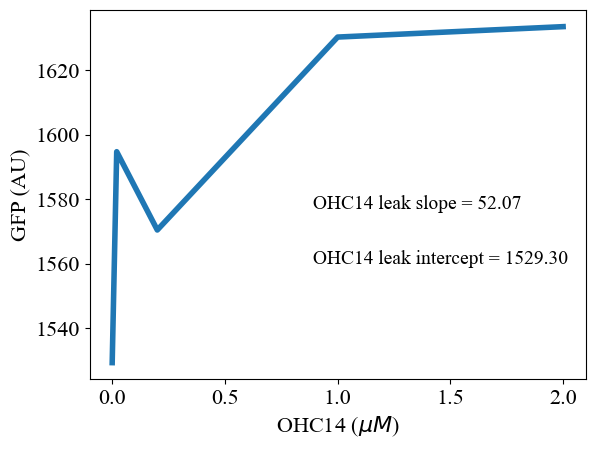

In [59]:
ax = plt.axes()
GFP_leak_OHC14 = np.array(RSI_df.iloc[0])
ax.plot(OHC14_vals, GFP_leak_OHC14, lw=4)
ohc14_leak_slope = (GFP_leak_OHC14[0] - GFP_leak_OHC14[-1]) / (OHC14_vals[0] - OHC14_vals[-1])
ohc14_leak_intercept = GFP_leak_OHC14[0] - ohc14_leak_slope * OHC14_vals[0]
ax.annotate(f"OHC14 leak slope = {ohc14_leak_slope:.2f}", xy=(0.45, 0.5), xycoords="axes fraction",
            fontsize=14, ha="left", va="top")
ax.annotate(f"OHC14 leak intercept = {ohc14_leak_intercept:.2f}", xy=(0.45, 0.35), xycoords="axes fraction",
            fontsize=14, ha="left", va="top")
# plt.plot(np.array(Sal), leak_slope*np.array(Sal) + leak_intercept, alpha=0.4, lw=7)
ax.set_xlabel("OHC14 ($\mu M$)", fontsize=16)
ax.set_ylabel("GFP (AU)", fontsize=16)
ax.tick_params(axis="both", which="major", labelsize=16)
# plt.savefig("RFP_leak.svg")

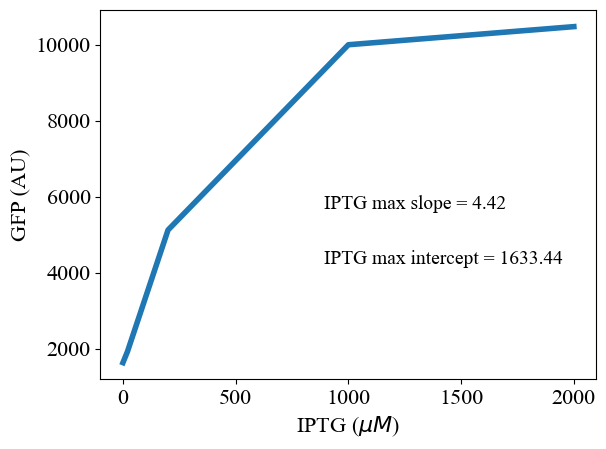

In [60]:
ax = plt.axes()
GFP_max_IPTG = np.array(RSI_df.loc[:, RSI_df.columns[-1]])
ax.plot(IPTG_vals, GFP_max_IPTG, lw=4)
iptg_max_slope = (GFP_max_IPTG[0] - GFP_max_IPTG[-1]) / (IPTG_vals[0] - IPTG_vals[-1])
iptg_max_intercept = GFP_max_IPTG[0] - iptg_max_slope * IPTG_vals[0]
ax.annotate(f"IPTG max slope = {iptg_max_slope:.2f}", xy=(0.45, 0.5), xycoords="axes fraction",
            fontsize=14, ha="left", va="top")
ax.annotate(f"IPTG max intercept = {iptg_max_intercept:.2f}", xy=(0.45, 0.35), xycoords="axes fraction",
            fontsize=14, ha="left", va="top")
# plt.plot(np.array(Sal), leak_slope*np.array(Sal) + leak_intercept, alpha=0.4, lw=7)
ax.set_xlabel("IPTG ($\mu M$)", fontsize=16)
ax.set_ylabel("GFP (AU)", fontsize=16)
ax.tick_params(axis="both", which="major", labelsize=16)
# plt.savefig("RFP_leak.svg")

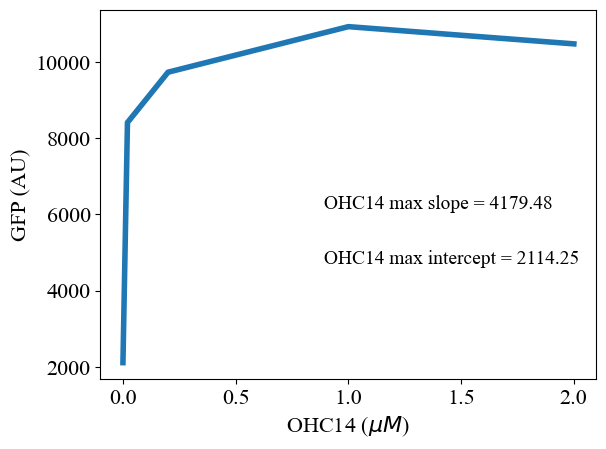

In [61]:
ax = plt.axes()
GFP_max_OHC14 = np.array(RSI_df.iloc[-1])
ax.plot(OHC14_vals, GFP_max_OHC14, lw=4)
ohc14_max_slope = (GFP_max_OHC14[0] - GFP_max_OHC14[-1]) / (OHC14_vals[0] - OHC14_vals[-1])
ohc14_max_intercept = GFP_max_OHC14[0] - ohc14_max_slope * OHC14_vals[0]
ax.annotate(f"OHC14 max slope = {ohc14_max_slope:.2f}", xy=(0.45, 0.5), xycoords="axes fraction",
            fontsize=14, ha="left", va="top")
ax.annotate(f"OHC14 max intercept = {ohc14_max_intercept:.2f}", xy=(0.45, 0.35), xycoords="axes fraction",
            fontsize=14, ha="left", va="top")
# plt.plot(np.array(Sal), leak_slope*np.array(Sal) + leak_intercept, alpha=0.4, lw=7)
ax.set_xlabel("OHC14 ($\mu M$)", fontsize=16)
ax.set_ylabel("GFP (AU)", fontsize=16)
ax.tick_params(axis="both", which="major", labelsize=16)
# plt.savefig("RFP_leak.svg")

In [62]:
# Synthetic data
atc_leak_slope = 10 
atc_max_slope = 0.1

In [63]:
contract_ohc14_off_iptg_off = PolyhedralContract.from_string(
    input_vars = ["IPTG", "OHC14", "aTc"],
    output_vars = ["GFP"],
    assumptions = [
        f'OHC14 <= {OHC14_vals[2]}',
        f'-OHC14 <= {-0.0001}',
        f'IPTG <= {IPTG_vals[2]}', 
        f'-IPTG <= {-0.01}',
        f'aTc <= {0.001}', 
        f'-aTc <= {-0.0001}',
    ],
    guarantees = [
        f'GFP - {iptg_leak_slope}*IPTG - {ohc14_leak_slope}*OHC14\
        - {atc_leak_slope}*aTc <= {1.1*GFP_leak_IPTG[-1]}',
        f'-GFP + {iptg_leak_slope}*IPTG + {ohc14_leak_slope}*OHC14\
        + {atc_leak_slope}*aTc <= {-0.5*GFP_leak_IPTG[0]}',
    ]
)

contract_ohc14_off_iptg_on = PolyhedralContract.from_string(
    input_vars = ["IPTG", "OHC14", "aTc"],
    output_vars = ["GFP"],
    assumptions = [
        f'OHC14 <= {OHC14_vals[2]}',
        f'-OHC14 <= {-0.0001}',
        f'IPTG <= {2*np.max(IPTG_vals)}', 
        f'-IPTG <= {-IPTG_vals[2]}',
        f'aTc <= {1}', 
        f'-aTc <= {-0.01}',
    ],
    guarantees = [
        f'GFP - {iptg_leak_slope}*IPTG - {ohc14_leak_slope}*OHC14\
        - {atc_leak_slope}*aTc <= {1.1*GFP_leak_IPTG[-1]}',
        f'-GFP + {iptg_leak_slope}*IPTG + {ohc14_leak_slope}*OHC14\
        + {atc_leak_slope}*aTc <= {-0.5*GFP_leak_IPTG[0]}',
    ]
)
contract_ohc14_on_iptg_off = PolyhedralContract.from_string(
    input_vars = ["IPTG", "OHC14", "aTc"],
    output_vars = ["GFP"],
    assumptions = [
        f'OHC14 <= {2*np.max(OHC14_vals)}',
        f'-OHC14 <= {-OHC14_vals[2]}',
        f'IPTG <= {IPTG_vals[2]}', 
        f'-IPTG <= {-0.01}',
        f'aTc <= {1}', 
        f'-aTc <= {-0.01}',
    ],
    guarantees = [
        f'GFP - {iptg_leak_slope}*IPTG - {ohc14_leak_slope}*OHC14\
        - {atc_leak_slope}*aTc <= {1.1*GFP_leak_OHC14[-1]}',
        f'-GFP + {iptg_leak_slope}*IPTG + {ohc14_leak_slope}*OHC14\
        + {atc_leak_slope}*aTc <= {-0.5*GFP_leak_OHC14[0]}',
    ]
)
contract_ohc14_on_iptg_on = PolyhedralContract.from_string(
    input_vars = ["IPTG", "OHC14", "aTc"],
    output_vars = ["GFP"],
    assumptions = [
        f'OHC14 <= {2*np.max(OHC14_vals)}',
        f'-OHC14 <= {-OHC14_vals[2]}',
        f'IPTG <= {2*np.max(IPTG_vals)}', 
        f'-IPTG <= {-IPTG_vals[2]}',
        f'aTc <= {1}', 
        f'-aTc <= {-0.01}',
    ],
    guarantees = [
        f'GFP - {iptg_max_slope}*IPTG - {ohc14_max_slope}*OHC14\
        - {atc_max_slope}*aTc <= {0.5*np.diag(RSI_df.values)[2:][-1]}',
        f'-GFP + {iptg_max_slope}*IPTG + {ohc14_max_slope}*OHC14\
        + {atc_max_slope}*aTc <= {-0.1*np.diag(RSI_df.values)[2:][0]}',
    ]
)

In [64]:
contract_ohc14_off_iptg_on

<Var InVars: [IPTG, OHC14, aTc]
OutVars:[GFP]
A: [
  OHC14 <= 0.2
  -OHC14 <= -0.0001
  IPTG <= 4000
  -IPTG <= -200
  aTc <= 1
  -aTc <= -0.01
]
G: [
  GFP - 0.2925 IPTG - 52.07 OHC14 - 10 aTc <= 2326
  -GFP + 0.2925 IPTG + 52.07 OHC14 + 10 aTc <= -764.7
]>

Plot the top-level contracts

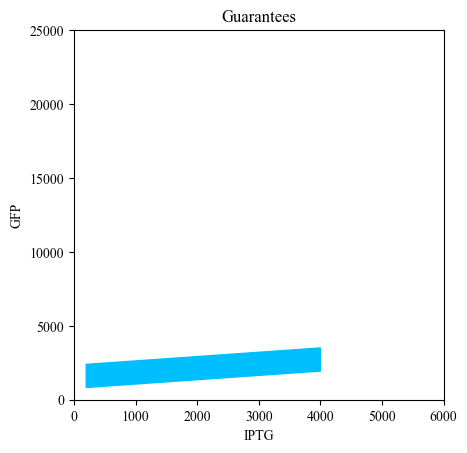

In [65]:
on_fig = plot_guarantees(contract_ohc14_off_iptg_on,
                         x_var="IPTG",
                         y_var="GFP",
                         var_values={"OHC14":0.01, "aTc":0.5},
                         x_lims=[0,6000], y_lims=[0,25000])

In [66]:
contract_ohc14_on_iptg_off

<Var InVars: [IPTG, OHC14, aTc]
OutVars:[GFP]
A: [
  OHC14 <= 4
  -OHC14 <= -0.2
  IPTG <= 200
  -IPTG <= -0.01
  aTc <= 1
  -aTc <= -0.01
]
G: [
  GFP - 0.2925 IPTG - 52.07 OHC14 - 10 aTc <= 1797
  -GFP + 0.2925 IPTG + 52.07 OHC14 + 10 aTc <= -764.7
]>

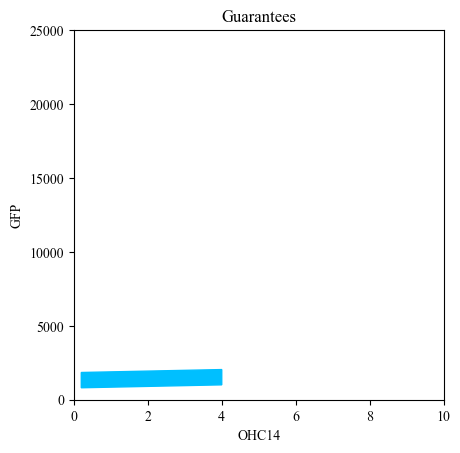

In [67]:
on_fig = plot_guarantees(contract_ohc14_on_iptg_off,
                         x_var="OHC14",
                         y_var="GFP",
                         var_values={"IPTG":100, "aTc":0.5},
                         x_lims=[0,10], y_lims=[0,25000])
# plt.savefig("andgate_top_level_off.svg")

In [68]:
contract_ohc14_on_iptg_on

<Var InVars: [IPTG, OHC14, aTc]
OutVars:[GFP]
A: [
  OHC14 <= 4
  -OHC14 <= -0.2
  IPTG <= 4000
  -IPTG <= -200
  aTc <= 1
  -aTc <= -0.01
]
G: [
  GFP - 4.42 IPTG - 4179 OHC14 - 0.1 aTc <= 5237
  -GFP + 4.42 IPTG + 4179 OHC14 + 0.1 aTc <= -175.6
]>

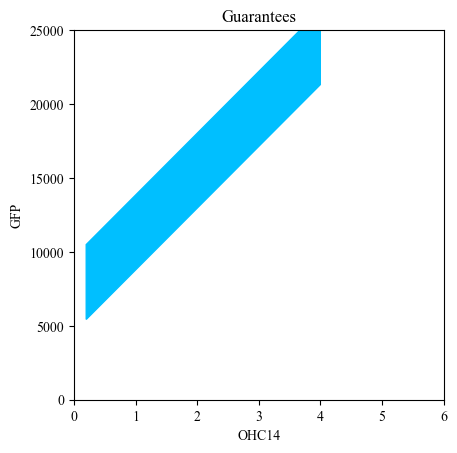

In [69]:
on_fig = plot_guarantees(contract_ohc14_on_iptg_on,
                         x_var="OHC14",
                         y_var="GFP",
                         var_values={"IPTG":1000, "aTc":0.5},
                         x_lims=[0,6], y_lims=[0,25000])
# plt.savefig("andgate_top_level_on.svg")

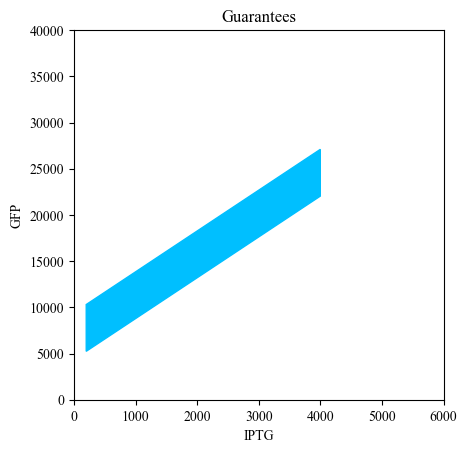

In [70]:
on_fig = plot_guarantees(contract_ohc14_on_iptg_on,
                         x_var="IPTG",
                         y_var="GFP",
                         var_values={"OHC14":1, "aTc":0.5},
                         x_lims=[0,6000], y_lims=[0,4e4])

Create sensor library

In [71]:
def create_sensor_contracts(sensor_input="AHL", output="FP", K=0.0, yleak=0.0,
                            start=0.0, ymax_lin=0.0, ymax_sat=0.0, std=0.0):
    """
    Creates the contracts for a Marionette sensing subsystem
    params:
        * input (str): The inducer input to the sensor
        * output (str): The output of the genetic construct.
                        Inducer activates the production of this output
        * K (float): The value of the Hill activation parameter K
        * yleak (float): The minimum expression of output even
                         in absence of inducer
        * start (float): The value of inducer at which the induction starts
        * ymax_lin (float): The maximum expression of output by the inducer
                            before saturating (the end of linear regime)
        * ymax_sat (float): The absolute maximum value of the sensor after it saturates
        * std (float): The standard deviation for each value to create contracts
    """    
    yleak1 = yleak + std * yleak
    yleak2 = yleak - std * yleak
    ymax_lin1 = ymax_lin - std*ymax_lin
    ymax_lin2 = ymax_lin + std*ymax_lin
    ymax_sat1 = ymax_sat - std*ymax_sat
    ymax_sat2 = ymax_sat + std*ymax_sat
    
    off_slope1 = (0.1 * yleak1 - yleak1) / (0.08 * start - start)
    off_slope2 = (0.1 * yleak2 - yleak2) / (0.08 * start - start)
    off_intercept1 = yleak1 - off_slope1 * start
    off_intercept2 = yleak2 - off_slope2 * start
    lin_slope1 = (ymax_lin1 - yleak1) / (K - start)
    lin_slope2 = (ymax_lin2 - yleak2) / (K - start)
    lin_intercept1 = yleak1 - lin_slope1 * start
    lin_intercept2 = yleak2 - lin_slope2 * start
    
    sat_slope1 = (ymax_lin1 - ymax_sat1) / (K - 8*K)
    sat_slope2 = (ymax_lin2 - ymax_sat2) / (K - 8*K)
    sat_intercept1 = ymax_lin1 - sat_slope1 * K
    sat_intercept2 = ymax_lin2 - sat_slope2 * K
    
    contract_0 = PolyhedralContract.from_string(
        input_vars=[sensor_input],
        output_vars=[output],
        assumptions=[f"{sensor_input} <= {start}",
                     f"-{sensor_input} <= -{0.08 * start}"
                    ],
        guarantees=[f"{output} - {off_slope1}{sensor_input} <= {off_intercept2}",
                    f"-{output} + {off_slope2}{sensor_input} <= {-1 * off_intercept1}"]
    )                
    contract_lin = PolyhedralContract.from_string(
        input_vars=[sensor_input],
        output_vars=[output],
        assumptions=[
            f"{sensor_input} <= {K}",
            f"-{sensor_input} <= {-1 * start}"
        ],
        guarantees=[
            f"-{output} + {lin_slope1}{sensor_input} <= {-1 * lin_intercept1}",
            f"{output} - {lin_slope2}{sensor_input} <= {1 * lin_intercept2}"
        ]
    )
    contract_max = PolyhedralContract.from_string(
        input_vars=[sensor_input],
        output_vars=[output],
        assumptions=[
            f"-{sensor_input} <= {-1 * K}",
            f"{sensor_input} <= {8 * K}"
        ],
        guarantees=[
            f"{output} - {sat_slope2}{sensor_input} <= {sat_intercept2}",
            f"-{output} + {sat_slope1}{sensor_input} <= {-1 * sat_intercept1}"
        ]
    )
    return contract_0, contract_lin, contract_max

In [72]:
# Create all sensor contracts:
sensor_names = [str(i) for i in df["Inducer"]]
sensor_library = {}
sensor_library_params = {}
for sensor in sensor_names:
    sensor_params = {}
    yleak_s = df.loc[df["Inducer"] == sensor]["ymin (RPUx10-3)"].values[0]
    yleak_s = yleak_s * 1e-3
    s_start = df.loc[df["Inducer"] == sensor]["start"].values[0]
    s_K = df.loc[df["Inducer"] == sensor]["K (µM)"].values[0]
    ymax_s = df.loc[df["Inducer"] == sensor]["ymax Linear"].values[0]
    ymax_sat = df.loc[df["Inducer"] == sensor]["ymax (RPU)"].values[0]
    std = df.loc[df["Inducer"] == sensor]["std"].values[0]
    sensor_params = {"leak": yleak_s, "start": s_start,
                     "K": s_K, "ymax": ymax_s, "std":std, "ymax_sat":ymax_sat}
    contract_s_0, contract_s_lin, contract_s_max = create_sensor_contracts(
        sensor_input=sensor, output="Output", start=s_start, K=s_K,
        ymax_lin=ymax_s, yleak=yleak_s, std=std, ymax_sat = ymax_sat
    )
    sensor_library[sensor] = [contract_s_0, contract_s_lin, contract_s_max]
    sensor_library_params[sensor] = sensor_params

In [73]:
sensor_library_params["OHC14"]["K"]

0.43

In [74]:
# Create available sensor contracts:
contract_aTc_off, contract_aTc_lin, contract_aTc_sat = create_sensor_contracts(
    sensor_input="aTc", output="dCas9", start=2*sensor_library_params["aTc"]["start"],
    K=sensor_library_params["aTc"]["K"],
    ymax_lin=sensor_library_params["aTc"]["ymax"], yleak=sensor_library_params["aTc"]["leak"],
    ymax_sat=sensor_library_params["aTc"]["ymax_sat"],
    std=sensor_library_params["aTc"]["std"]
)
contract_IPTG_off, contract_IPTG_lin, contract_IPTG_sat = create_sensor_contracts(
    sensor_input="IPTG", output="xLuxR1", start=sensor_library_params["IPTG"]["start"],
    K=2*sensor_library_params["IPTG"]["K"],
    ymax_lin=sensor_library_params["IPTG"]["ymax"], yleak=sensor_library_params["IPTG"]["leak"],
    ymax_sat=sensor_library_params["IPTG"]["ymax_sat"],
    std=sensor_library_params["IPTG"]["std"]
)
contract_OHC14_off, contract_OHC14_lin, contract_OHC14_sat = create_sensor_contracts(
    sensor_input="OHC14", output="xLuxR2", start=sensor_library_params["OHC14"]["start"],
    K=sensor_library_params["OHC14"]["K"],
    ymax_lin=sensor_library_params["OHC14"]["ymax"], yleak=sensor_library_params["OHC14"]["leak"],
    ymax_sat=sensor_library_params["OHC14"]["ymax_sat"],
    std=sensor_library_params["OHC14"]["std"]
)

Create repressor transcription factor library without inducer

In [75]:
# Function here
def create_reverse_sensor_contracts(sensor_input="AHL", output="FP", K=0.0, yleak=0.0,
                            start=0.0, ymax_lin=0.0, ymax_sat=0.0, std=0.0):
    """
    Creates the contracts for a Marionette sensing subsystem
    params:
        * input (str): The inducer input to the sensor
        * output (str): The output of the genetic construct.
                        Inducer activates the production of this output
        * K (float): The value of the Hill activation parameter K
        * yleak (float): The minimum expression of output even
                         in absence of inducer
        * start (float): The value of inducer at which the induction starts
        * ymax_lin (float): The maximum expression of output by the inducer
                            before saturating (the end of linear regime)
        * ymax_sat (float): The absolute maximum value of the sensor after it saturates
        * std (float): The standard deviation for each value to create contracts
    """    
    yleak1 = yleak + std * yleak
    yleak2 = yleak - std * yleak
    ymax_lin1 = ymax_lin - std*ymax_lin
    ymax_lin2 = ymax_lin + std*ymax_lin
    ymax_sat1 = ymax_sat - std*ymax_sat
    ymax_sat2 = ymax_sat + std*ymax_sat
    
    off_slope1 = (0.1*yleak1 - yleak1) / (0.8 * start - start)
    off_slope2 = (0.1*yleak2 - yleak2) / (0.8 * start - start)


    off_intercept1 = yleak1 - off_slope1 * start
    off_intercept2 = yleak2 - off_slope2 * start
    lin_slope1 = (ymax_lin1 - yleak1) / (K - start)
    lin_slope2 = (ymax_lin2 - yleak2) / (K - start)
    lin_intercept1 = yleak1 - lin_slope1 * start
    lin_intercept2 = yleak2 + lin_slope2 * start
    
    sat_slope1 = (ymax_lin1 - ymax_sat1) / (K - 8*K)
    sat_slope2 = (ymax_lin2 - ymax_sat2) / (K - 8*K)
    sat_intercept1 = ymax_lin1 - sat_slope1 * K
    sat_intercept2 = ymax_lin2 - sat_slope2 * K
    
    contract_0 = PolyhedralContract.from_string(
        input_vars=[sensor_input],
        output_vars=[output],
        assumptions=[f"{sensor_input} <= {10*start}",
                     f"-{sensor_input} <= -{0.8 * start}"
                    ],
        guarantees=[f"{output} - {off_slope1}{sensor_input} <= {10000 * (ymax_sat2 - off_intercept2)}",
                    f"-{output} + {off_slope2}{sensor_input}<= {-10000 * (ymax_sat1 - off_intercept1)}"]
    )                
    contract_lin = PolyhedralContract.from_string(
        input_vars=[sensor_input],
        output_vars=[output],
        assumptions=[
            f"{sensor_input} <= {K}",
            f"-{sensor_input} <= {-1 * start}"
        ],
        guarantees=[
            f"{output} + {lin_slope2}{sensor_input} <= {1 * (ymax_sat2 - lin_intercept2)}",
            f"-{output} - {lin_slope1}{sensor_input} <= {-1 * (ymax_sat1 - lin_intercept1)}",

        ]
    )
    contract_max = PolyhedralContract.from_string(
        input_vars=[sensor_input],
        output_vars=[output],
        assumptions=[
            f"-{sensor_input} <= {-1 * K}",
            f"{sensor_input} <= {8 * K}"
        ],
        guarantees=[
            f"{output} - {sat_slope1}{sensor_input} <= {100*(ymax_sat2 - sat_intercept2)}",
            f"-{output} + {sat_slope2}{sensor_input} <= {-100*(ymax_sat1 - sat_intercept1)}"
        ]
    )
    return contract_0, contract_lin, contract_max


In [76]:
# Create all reverse sensor contracts:
reg_names = [str(i) for i in df["Regulator"]]
# sensor_names = ["OC6"]
regulator_library = {}
regulator_library_params = {}
for reg in reg_names:
    regulator_params = {}
    yleak_s = df.loc[df["Regulator"] == reg]["ymin (RPUx10-3)"].values[0]
    yleak_s = yleak_s * 1e-3
    s_start = df.loc[df["Regulator"] == reg]["start"].values[0]
    s_K = df.loc[df["Regulator"] == reg]["K (µM)"].values[0]
    ymax_s = df.loc[df["Regulator"] == reg]["ymax Linear"].values[0]
    ymax_sat = df.loc[df["Regulator"] == reg]["ymax (RPU)"].values[0]
    std = df.loc[df["Regulator"] == reg]["std"].values[0]
    regulator_params = {"leak": yleak_s, "start": s_start,
                     "K": s_K, "ymax": ymax_s, "std":std, "ymax_sat":ymax_sat}
    s_output = "dCas9"
    contract_s_0, contract_s_lin, contract_s_max = create_reverse_sensor_contracts(
        sensor_input=reg, output="GFP", start=s_start, K=s_K,
        ymax_lin=ymax_s, yleak=yleak_s, std=std, ymax_sat = ymax_sat
    )
    regulator_library[reg] = [contract_s_0, contract_s_lin, contract_s_max]
    regulator_library_params[reg] = regulator_params

In [77]:
# Write here
contract_LuxR_off, contract_LuxR_lin, contract_LuxR_sat = create_reverse_sensor_contracts(
    sensor_input="LuxR", output="GFP", start=10*regulator_library_params["LuxR"]["start"],
    K=100*regulator_library_params["LuxR"]["K"],
    ymax_lin=regulator_library_params["LuxR"]["ymax"],
    yleak=regulator_library_params["LuxR"]["leak"],
    std=regulator_library_params["LuxR"]["std"],
    ymax_sat = regulator_library_params["LuxR"]["ymax_sat"]
    )

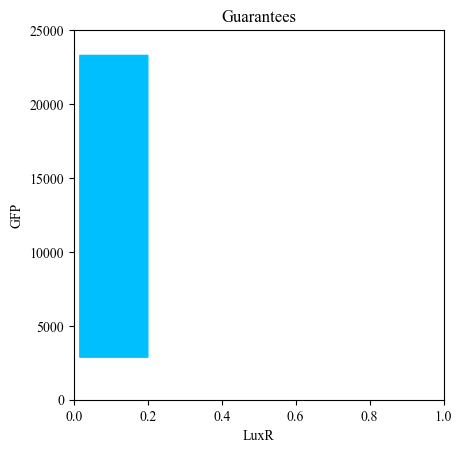

In [78]:
on_fig = plot_guarantees(contract_LuxR_off,
                         x_var="LuxR",
                         y_var="GFP",
                         var_values={},
                         x_lims=[0,1], y_lims=[0,25000])
plt.savefig("LuxR_off.svg")

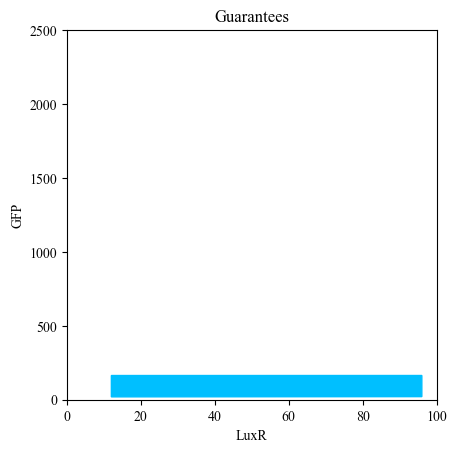

In [79]:
on_fig = plot_guarantees(contract_LuxR_sat,
                         x_var="LuxR",
                         y_var="GFP",
                         var_values={},
                         x_lims=[0,100], y_lims=[0,2500])
plt.savefig("LuxR_on.svg")

Create dCas9 contracts from NAND gate design

In [80]:
dCas9_inactive = PolyhedralContract.from_string(
    input_vars=["dCas9", "xLuxR"],
    output_vars=["LuxR"],
    assumptions=[
      "dCas9 <= 0.007795",
      "-dCas9 <= -0.0002795",
      "xLuxR <= 0.007098",
      "-xLuxR <= -0.0002871",
    ],
    guarantees=[
      "-LuxR + 5.365 dCas9 + 72590 xLuxR <= 20",
      "LuxR - 47.31 dCas9 - 4.65e+05 xLuxR <= 0.07",]
)
dCas9_inactive = PolyhedralContract.from_string(
    input_vars=["dCas9", "xLuxR"],
    output_vars=["LuxR"],
    assumptions=[
      "dCas9 <= 0.002097",
      "-dCas9 <= -0.0002097",
      "xLuxR <= 0.00572",
      "-xLuxR <= -0.000572",
    ],
    guarantees=[
      "-LuxR + 0.006645 dCas9 + 0.004 xLuxR <= -15",
      "LuxR - 6.521e-06 dCas9 - 0.0500 xLuxR <= 80",]
)
dCas9_active = PolyhedralContract.from_string(
    input_vars=["dCas9", "xLuxR"],
    output_vars=["LuxR"],
    assumptions=[
      "dCas9 <= 2.302",
      "-dCas9 <= -0.2097",
      "xLuxR <= 5.0889",
      "-xLuxR <= -0.00572",
    ],
    guarantees=[
      "-LuxR + 0.006645 dCas9 + 0.004 xLuxR <= -0.005",
      "LuxR - 6.521e-06 dCas9 - 0.0500 xLuxR <= 0.001",]
)

Quotient to find gRNA1 and gRNA2 binding mechanism

In [81]:
sensors_comp_iptg_ohc14 = contract_IPTG_sat.compose(contract_OHC14_sat)
sensors_comp = sensors_comp_iptg_ohc14.compose(contract_aTc_sat)
repress_LuxR = sensors_comp.compose(dCas9_active)
composition_of_others = contract_LuxR_off.compose(repress_LuxR)

In [82]:
composition_of_others

<Var InVars: [IPTG, OHC14, aTc, xLuxR]
OutVars:[GFP, xLuxR1, xLuxR2]
A: [
  0.0001792 aTc + 0.05 xLuxR <= 0.199
  -0.02185 aTc - 0.004 xLuxR <= -0.009864
  27.48 aTc <= 0.873
  -IPTG <= -280
  IPTG <= 2240
  -OHC14 <= -0.43
  OHC14 <= 3.44
  -aTc <= -0.013
]
G: [
  GFP - 0.0001732 aTc - 0.04833 xLuxR <= 2.329e+04
  -GFP + 0.002477 aTc + 0.0004533 xLuxR <= -2879
  -0.00165 IPTG + xLuxR1 <= 2.233
  0.0001868 IPTG - xLuxR1 <= -0.2528
  -0.4544 OHC14 + xLuxR2 <= 1.001
  0.07713 OHC14 - xLuxR2 <= -0.17
]>

In [83]:
repress_LuxR

<Var InVars: [IPTG, OHC14, aTc, xLuxR]
OutVars:[xLuxR1, xLuxR2, LuxR]
A: [
  27.48 aTc <= 0.873
  xLuxR <= 5.089
  -xLuxR <= -0.00572
  -IPTG <= -280
  IPTG <= 2240
  -OHC14 <= -0.43
  OHC14 <= 3.44
  -aTc <= -0.013
]
G: [
  -0.00165 IPTG + xLuxR1 <= 2.233
  0.0001868 IPTG - xLuxR1 <= -0.2528
  -0.4544 OHC14 + xLuxR2 <= 1.001
  0.07713 OHC14 - xLuxR2 <= -0.17
  -150.5 LuxR + 3.288 aTc + 0.602 xLuxR <= -0.9234
  LuxR - 0.0001792 aTc - 0.05 xLuxR <= 0.001009
]>

In [84]:
composition_of_others

<Var InVars: [IPTG, OHC14, aTc, xLuxR]
OutVars:[GFP, xLuxR1, xLuxR2]
A: [
  0.0001792 aTc + 0.05 xLuxR <= 0.199
  -0.02185 aTc - 0.004 xLuxR <= -0.009864
  27.48 aTc <= 0.873
  -IPTG <= -280
  IPTG <= 2240
  -OHC14 <= -0.43
  OHC14 <= 3.44
  -aTc <= -0.013
]
G: [
  GFP - 0.0001732 aTc - 0.04833 xLuxR <= 2.329e+04
  -GFP + 0.002477 aTc + 0.0004533 xLuxR <= -2879
  -0.00165 IPTG + xLuxR1 <= 2.233
  0.0001868 IPTG - xLuxR1 <= -0.2528
  -0.4544 OHC14 + xLuxR2 <= 1.001
  0.07713 OHC14 - xLuxR2 <= -0.17
]>

In [85]:
contract_ohc14_on_iptg_on

<Var InVars: [IPTG, OHC14, aTc]
OutVars:[GFP]
A: [
  OHC14 <= 4
  -OHC14 <= -0.2
  IPTG <= 4000
  -IPTG <= -200
  aTc <= 1
  -aTc <= -0.01
]
G: [
  GFP - 4.42 IPTG - 4179 OHC14 - 0.1 aTc <= 5237
  -GFP + 4.42 IPTG + 4179 OHC14 + 0.1 aTc <= -175.6
]>

In [86]:
contract_ohc14_on_iptg_on = PolyhedralContract.from_string(
    input_vars = ["IPTG", "OHC14", "aTc"],
    output_vars = ["GFP"],
    assumptions = [
        f'OHC14 <= {np.max(OHC14_vals)}',
        f'-OHC14 <= {-0.5*OHC14_vals[3]}',
        f'IPTG <= {np.max(IPTG_vals)}', 
        f'-IPTG <= {-2*IPTG_vals[2]}',
        f'aTc <= {0.025}', 
        f'-aTc <= {-0.015}',
    ],
    guarantees = [
        f'GFP - {0.01*iptg_max_slope}*IPTG - {0.01*ohc14_max_slope}*OHC14\
        - {atc_max_slope}*aTc <= {2.5*np.diag(RSI_df.values)[2:][-1]}',
        f'-GFP + {0.01*iptg_max_slope}*IPTG + {0.01*ohc14_max_slope}*OHC14\
        + {atc_max_slope}*aTc <= {-0.5*np.diag(RSI_df.values)[2:][0]}',
    ]
)

In [87]:
gRNA1_gRNA2_binding_active = contract_ohc14_on_iptg_on.quotient(composition_of_others)

Composition strategy to choose best repression transcription factor among (DAPG, Cuma, Van, OC6)

In [88]:
gRNA1_gRNA2_binding_active

<Var InVars: [xLuxR1, xLuxR2]
OutVars:[xLuxR]
A: [
  
]
G: [
  0.05 xLuxR <= 0.199
  -0.004 xLuxR <= -0.009536
]>

In [89]:
sensors_comp_iptg_ohc14_off = contract_IPTG_off.compose(contract_OHC14_off)
sensors_comp_off = sensors_comp_iptg_ohc14_off.compose(contract_aTc_off)
unrepressed_LuxR = sensors_comp_off.compose(dCas9_inactive)
composition_of_others_off = contract_LuxR_sat.compose(unrepressed_LuxR)

In [90]:
composition_of_others_off

<Var InVars: [IPTG, OHC14, aTc, xLuxR]
OutVars:[GFP, xLuxR1, xLuxR2]
A: [
  2.378 aTc <= 0.002074
  xLuxR <= 0.00572
  -xLuxR <= -0.000572
  IPTG <= 2
  -IPTG <= -0.16
  OHC14 <= 0.016
  -OHC14 <= -0.00128
  -aTc <= -0.000288
]
G: [
  GFP - 3.1e-08 aTc - 9.994e-05 xLuxR <= 163.8
  -GFP + 3.224e-05 aTc + 6.819e-05 xLuxR <= -19.45
  -0.004218 IPTG + xLuxR1 <= 2.122e-05
  0.0004776 IPTG - xLuxR1 <= -0.0001875
  -0.3136 OHC14 + xLuxR2 <= 1.893e-05
  0.05323 OHC14 - xLuxR2 <= -0.0001115
]>

In [91]:
contract_ohc14_off_iptg_off = PolyhedralContract.from_string(
    input_vars = ["IPTG", "OHC14", "aTc"],
    output_vars = ["GFP"],
    assumptions = [
        f'OHC14 <= {0.01}',
        f'-OHC14 <= {-0.0015}',
        f'IPTG <= {1.5}', 
        f'-IPTG <= {-0.2}',
        f'aTc <= {0.0008}', 
        f'-aTc <= {-0.000388}',
    ],
    guarantees = [
        f'GFP - {iptg_leak_slope}*IPTG - {ohc14_leak_slope}*OHC14\
        - {atc_leak_slope}*aTc <= {0.2*GFP_leak_IPTG[-1]}',
        f'-GFP + {iptg_leak_slope}*IPTG + {ohc14_leak_slope}*OHC14\
        + {atc_leak_slope}*aTc <= {-0.01*GFP_leak_IPTG[0]}',
    ]
)

In [92]:
gRNA1_gRNA2_binding_inactive = contract_ohc14_off_iptg_off.quotient(composition_of_others_off)

In [93]:
# Function here
def create_reverse_sensor_contracts(sensor_input="AHL", output="FP", K=0.0, yleak=0.0,
                            start=0.0, ymax_lin=0.0, ymax_sat=0.0, std=0.0):
    """
    Creates the contracts for a Marionette sensing subsystem
    params:
        * input (str): The inducer input to the sensor
        * output (str): The output of the genetic construct.
                        Inducer activates the production of this output
        * K (float): The value of the Hill activation parameter K
        * yleak (float): The minimum expression of output even
                         in absence of inducer
        * start (float): The value of inducer at which the induction starts
        * ymax_lin (float): The maximum expression of output by the inducer
                            before saturating (the end of linear regime)
        * ymax_sat (float): The absolute maximum value of the sensor after it saturates
        * std (float): The standard deviation for each value to create contracts
    """    
    yleak1 = yleak + std * yleak
    yleak2 = yleak - std * yleak
    ymax_lin1 = ymax_lin - std*ymax_lin
    ymax_lin2 = ymax_lin + std*ymax_lin
    ymax_sat1 = ymax_sat - std*ymax_sat
    ymax_sat2 = ymax_sat + std*ymax_sat
    
    off_slope1 = (0.1*yleak1 - yleak1) / (0.8 * start - 100*start)
    off_slope2 = (0.1*yleak2 - yleak2) / (0.8 * start - 100*start)


    off_intercept1 = yleak1 - off_slope1 * 100*start
    off_intercept2 = yleak2 - off_slope2 * 100*start
    lin_slope1 = (ymax_lin1 - yleak1) / (K - 100*start)
    lin_slope2 = (ymax_lin2 - yleak2) / (K - 100*start)
    lin_intercept1 = yleak1 - lin_slope1 * 100*start
    lin_intercept2 = yleak2 + lin_slope2 * 100*start
    
    sat_slope1 = (ymax_lin1 - ymax_sat1) / (K - 8*K)
    sat_slope2 = (ymax_lin2 - ymax_sat2) / (K - 8*K)
    sat_intercept1 = ymax_lin1 - sat_slope1 * K
    sat_intercept2 = ymax_lin2 - sat_slope2 * K
    
    contract_0 = PolyhedralContract.from_string(
        input_vars=[sensor_input],
        output_vars=[output],
        assumptions=[
#             f"{sensor_input} <= {100*start}",
#             f"-{sensor_input} <= -{0.8 * start}"
#             f"{sensor_input} <= {0.2}",
#             f"-{sensor_input} <= -{0.016}"
        ],
        guarantees=[f"{output} - {off_slope1}{sensor_input} <= {1000 * (ymax_sat2 - off_intercept2)}",
                    f"-{output} + {off_slope2}{sensor_input}<= {-1000 * (ymax_sat1 - off_intercept1)}"]
    )                
    contract_lin = PolyhedralContract.from_string(
        input_vars=[sensor_input],
        output_vars=[output],
        assumptions=[
            f"{sensor_input} <= {K}",
            f"-{sensor_input} <= {-100 * start}"
        ],
        guarantees=[
            f"{output} + {lin_slope2}{sensor_input} <= {1 * (ymax_sat2 - lin_intercept2)}",
            f"-{output} - {lin_slope1}{sensor_input} <= {-1 * (ymax_sat1 - lin_intercept1)}",

        ]
    )
    contract_max = PolyhedralContract.from_string(
        input_vars=[sensor_input],
        output_vars=[output],
        assumptions=[
#             f"-{sensor_input} <= {-K}",
#             f"{sensor_input} <= {8*K}"
            f"-{sensor_input} <= {-12}",
            f"{sensor_input} <= {96}"
        ],
        guarantees=[
            f"{output} - {sat_slope1}{sensor_input} <= {200*(ymax_sat2 - sat_intercept2)}",
            f"-{output} + {sat_slope2}{sensor_input} <= {-200*(ymax_sat1 - sat_intercept1)}"
        ]
    )
    return contract_0, contract_lin, contract_max


In [94]:
def create_dCas9_repression_contracts(regulator):
    xregulator = "x"+regulator
    dCas9_inactive = PolyhedralContract.from_string(
        input_vars=["dCas9", xregulator],
        output_vars=[regulator],
        assumptions=[
          "dCas9 <= 0.002097",
          "-dCas9 <= -0.0002097",
          f"{xregulator} <= 0.00572",
          f"-{xregulator} <= -0.000572",
        ],
        guarantees=[
          f"-{regulator} + 0.006645 dCas9 + 0.004 {xregulator} <= -15",
          f"{regulator} - 6.521e-06 dCas9 - 0.0500 {xregulator} <= 80",]
    )
    dCas9_active = PolyhedralContract.from_string(
        input_vars=["dCas9", xregulator],
        output_vars=[regulator],
        assumptions=[
          "dCas9 <= 2.302",
          "-dCas9 <= -0.2097",
          f"{xregulator} <= 5.0889",
          f"-{xregulator} <= -0.00572",
        ],
        guarantees=[
          f"-{regulator} + 0.006645 dCas9 + 0.004 {xregulator} <= -0.005",
          f"{regulator} - 6.521e-06 dCas9 - 0.0500 {xregulator} <= 0.001",]
    )
    return dCas9_inactive, dCas9_active

In [95]:
def create_gRNA_binding_contracts(regulator):
    xregulator = "x"+regulator
    xregulator1 = "x"+regulator+"1"
    xregulator2 = "x"+regulator+"2"
    gRNA1_gRNA2_binding_inactive = PolyhedralContract.from_string(
        input_vars=[xregulator1, xregulator2],
        output_vars=[xregulator],
        assumptions=[],
        guarantees=[
            f"{xregulator} <= 0.00572",
            f"-{xregulator} <= -0.000572"
        ]
    )
    gRNA1_gRNA2_binding_active = PolyhedralContract.from_string(
        input_vars=[xregulator1, xregulator2],
        output_vars=[xregulator],
        assumptions=[],
        guarantees=[
            f"-27.21 {xregulator} + 2.392e+04 {xregulator1} + 6095 {xregulator2} <= 9128",
            f"0.05 {xregulator} <= 0.199",
            f"-0.004 {xregulator} <= -0.009485"
        ]
    )
    return gRNA1_gRNA2_binding_inactive, gRNA1_gRNA2_binding_active

In [96]:
contract_aTc_off, _, contract_aTc_sat = create_sensor_contracts(
        sensor_input="aTc", output="dCas9", start=2*sensor_library_params["aTc"]["start"],
        K=sensor_library_params["aTc"]["K"],
        ymax_lin=sensor_library_params["aTc"]["ymax"], yleak=sensor_library_params["aTc"]["leak"],
        ymax_sat=sensor_library_params["aTc"]["ymax_sat"],
        std=sensor_library_params["aTc"]["std"]
    )
contract_IPTG_off, _, contract_IPTG_sat = create_sensor_contracts(
        sensor_input="IPTG", output="xLuxR1", start=sensor_library_params["IPTG"]["start"],
        K=2*sensor_library_params["IPTG"]["K"],
        ymax_lin=sensor_library_params["IPTG"]["ymax"], yleak=sensor_library_params["IPTG"]["leak"],
        ymax_sat=sensor_library_params["IPTG"]["ymax_sat"],
        std=sensor_library_params["IPTG"]["std"]
    )
contract_OHC14_off, _, contract_OHC14_sat = create_sensor_contracts(
        sensor_input="OHC14", output="xLuxR2", start=10*sensor_library_params["OHC14"]["start"],
        K=100*sensor_library_params["OHC14"]["K"],
        ymax_lin=sensor_library_params["OHC14"]["ymax"], yleak=sensor_library_params["OHC14"]["leak"],
        ymax_sat=sensor_library_params["OHC14"]["ymax_sat"],
        std=sensor_library_params["OHC14"]["std"]
    )
gRNA1_gRNA2_binding_inactive, gRNA1_gRNA2_binding_active = create_gRNA_binding_contracts("LuxR")
dCas9_inactive, dCas9_active = create_dCas9_repression_contracts("LuxR")

In [97]:
search_regulators = ['PhlFAM', 'CymRAM', 'LuxR', 'VanRAM']
design_error = {}
fold_change = {}
for regulator in search_regulators:
    GFP_on = None
    GFP_off = None
    xregulator1 = "x"+regulator+"1"
    xregulator2 = "x"+regulator+"2"
    contract_aTc_off, _, contract_aTc_sat = create_sensor_contracts(
        sensor_input="aTc", output="dCas9", start=2*sensor_library_params["aTc"]["start"],
        K=sensor_library_params["aTc"]["K"],
        ymax_lin=sensor_library_params["aTc"]["ymax"], yleak=sensor_library_params["aTc"]["leak"],
        ymax_sat=sensor_library_params["aTc"]["ymax_sat"],
        std=sensor_library_params["aTc"]["std"]
    )
    contract_IPTG_off, _, contract_IPTG_sat = create_sensor_contracts(
        sensor_input="IPTG", output=xregulator1, start=sensor_library_params["IPTG"]["start"],
        K=2*sensor_library_params["IPTG"]["K"],
        ymax_lin=sensor_library_params["IPTG"]["ymax"], yleak=sensor_library_params["IPTG"]["leak"],
        ymax_sat=sensor_library_params["IPTG"]["ymax_sat"],
        std=sensor_library_params["IPTG"]["std"]
    )
    contract_OHC14_off, _, contract_OHC14_sat = create_sensor_contracts(
        sensor_input="OHC14", output=xregulator2, start=10*sensor_library_params["OHC14"]["start"],
        K=100*sensor_library_params["OHC14"]["K"],
        ymax_lin=sensor_library_params["OHC14"]["ymax"], yleak=sensor_library_params["OHC14"]["leak"],
        ymax_sat=sensor_library_params["OHC14"]["ymax_sat"],
        std=sensor_library_params["OHC14"]["std"]
    )
    contract_reg_off, _, contract_reg_sat = create_reverse_sensor_contracts(
        sensor_input=regulator, output="GFP", start=10*regulator_library_params[regulator]["start"],
        K=100*regulator_library_params[regulator]["K"],
        ymax_lin=regulator_library_params[regulator]["ymax"],
        yleak=regulator_library_params[regulator]["leak"],
        std=regulator_library_params[regulator]["std"],
        ymax_sat = regulator_library_params[regulator]["ymax_sat"]
    )
    if regulator == "LuxR":
        print(contract_reg_off)
    gRNA1_gRNA2_binding_inactive, gRNA1_gRNA2_binding_active = create_gRNA_binding_contracts(regulator)
    dCas9_inactive, dCas9_active = create_dCas9_repression_contracts(regulator)
    # Off condition
    try:
        gRNA_unbound = contract_IPTG_off.compose(contract_OHC14_off).compose(gRNA1_gRNA2_binding_inactive)
        all_others_off = gRNA_unbound.compose(contract_aTc_off).compose(dCas9_inactive)
        top_level_off = all_others_off.compose(contract_reg_sat)
#         print("{0} works, top_level_off contract is {1}".format(regulator,top_level_off))
    except Exception as e:
        design_error[regulator+"_off"] = e
#         print(e)
    else:
        # Compute GFP minimum value
        new_g = top_level_off.g.evaluate({Var("aTc"):0.0001})
        GFP_off = new_g.optimize(objective = {Var("GFP"):1}, maximize = True)
    # On condition
    try:
        gRNA_bound = contract_IPTG_sat.compose(contract_OHC14_sat).compose(gRNA1_gRNA2_binding_active)
        all_others_on = gRNA_bound.compose(contract_aTc_sat).compose(dCas9_active)
        top_level_on = all_others_on.compose(contract_reg_off)
#         print("{0} works, top_level_on contract is {1}".format(regulator,top_level_on))
    except Exception as e:
#         print(e)
        design_error[regulator+"_on"] = e
    else:
        # Compute GFP minimum value
        new_g = top_level_on.g.evaluate({Var("aTc"):0.02})
        GFP_on = new_g.optimize(objective = {Var("GFP"):1}, maximize = True)
    if GFP_on is not None and GFP_off is not None:
        fold_change[regulator] = GFP_on/GFP_off

InVars: [LuxR]
OutVars:[GFP]
A: [
  
]
G: [
  GFP - 0.001949 LuxR <= 2327
  -GFP + 0.0002285 LuxR <= -272.5
]


In [98]:
fold_change

{'PhlFAM': 21.873683679290426,
 'CymRAM': 9.521826709511018,
 'LuxR': 7.105762122801471,
 'VanRAM': 10.937324253023018}

In [99]:
design_error.keys()

dict_keys([])

In [100]:
exp_fold_change = {}
for key in fold_change:
    exp_fold_change[key] = 0
exp_fold_change["LuxR"] = RSI_df.iloc[-1,-1]/RSI_df.iloc[0,0]
# exp_fold_change["Sal"] = np.mean(RFP_Sal_aTc[0])/np.mean(RFP_Sal_aTc[1:3])

In [103]:
RSI_df

OHC14,0,20,200,1000,2000
IPTG,,,,,
0,1529.300379,1594.680904,1570.411433,1630.207295,1633.438872
20,1676.780676,1675.305695,1711.141951,1756.749950,1924.160180
200,1700.588085,1696.271817,1755.600414,2016.412214,5123.377631
1000,1741.275334,2004.426161,2515.260613,9370.224276,9997.122302
2000,2114.251447,8410.291272,9730.160544,10924.858500,10473.208230


In [146]:
# Create a dictionary exp_on_values and exp_off_values with keys Lux, Phi, and Van, 
# where on value is last row and last column and off value is first row and first column
exp_on_values = {}
exp_off_values = {}
# Do this for LuxB_df, PhiF_df, and VanCC_df, keys are "LuxR", "PhlFAM", and "VanRAM"
# Use LuxB_df, PhiB_df, and VanB_df
exp_on_values["LuxR"] = LuxB_df.iloc[-1,-1]
exp_off_values["LuxR"] = LuxB_df.iloc[0,0]
exp_on_values["PhlFAM"] = PhiF_df.iloc[-1,-1]
exp_off_values["PhlFAM"] = PhiF_df.iloc[0,0]
exp_on_values["VanRAM"] = VanCC_df.iloc[-1,-1]
exp_off_values["VanRAM"] = VanCC_df.iloc[0,0]


In [143]:
LuxB_df

IPTG,0,125,250,500,1000,2000
OHC14,,,,,,
0,697.760717,692.642354,757.750163,736.955148,726.638089,835.535600
2.5,769.927774,750.232249,841.529334,798.810311,767.699407,842.154882
5,835.904437,868.203390,855.056932,883.592167,854.840894,1180.152672
10,966.872006,905.657805,1104.458599,1001.121233,2589.372694,3010.233258
20,877.900194,2438.801906,2540.771930,2961.609033,3151.884853,3611.780636
mean,829.673025,1131.107541,1219.913392,1276.417579,1618.087187,1895.971410
std,91.824401,658.381111,670.505282,847.242413,1038.875988,1177.542408


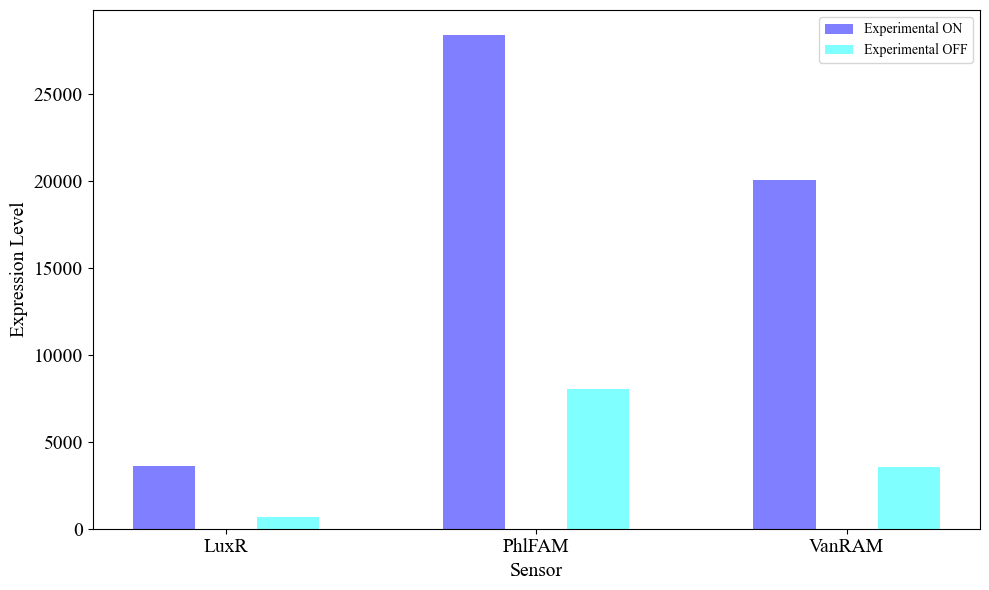

In [148]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(10, 6))  # Adjusting figure size for more space

bar_width = 0.05  
bar_spacing = 0.05  # Space between on/off bars

# sensor_labels = list(on_values.keys())
sensor_labels = ["LuxR", "PhlFAM", "VanRAM"]
sensor_ticks = []

# Iterate through sensor keys.
for i, key in enumerate(sensor_labels):
    on_pos = i * (bar_width * 2 + bar_spacing * 3)  # Calculating x-axis position
    off_pos = on_pos + bar_width + bar_spacing
    
    # Add labels and tick positions
    sensor_ticks.append((on_pos + off_pos) / 2)
    
    # Shaded area for model ON/OFF values (assuming you have min and max values)
#     ax.fill_between([on_pos - bar_width/2, on_pos + bar_width/2], 
#                    min_on_value, max_on_value, color="C1", alpha=0.3)
#     ax.fill_between([off_pos - bar_width/2, off_pos + bar_width/2], 
#                    min_off_value, max_off_value, color="C2", alpha=0.3)
    
    # Bar plots for experimental ON/OFF values
    ax.bar(on_pos, exp_on_values[key], bar_width, color="blue", alpha=0.5, 
           capsize=5, label="Experimental ON" if i == 0 else "")
    ax.bar(off_pos, exp_off_values[key], bar_width, color="cyan", alpha=0.5, 
           capsize=5, label="Experimental OFF" if i == 0 else "")
    
    # Scatter plots for individual replicates
    # Note: Add your scatter plot logic here if you have individual data points
    
# Aesthetics
ax.set_xlabel("Sensor", fontsize=14)
ax.set_xticks(sensor_ticks)
ax.set_xticklabels(sensor_labels, fontsize=14)
ax.set_ylabel("Expression Level", fontsize=14)
plt.legend()
plt.yticks(fontsize=14)
plt.tight_layout()
# plt.savefig("regulator_expression.svg")
plt.show()


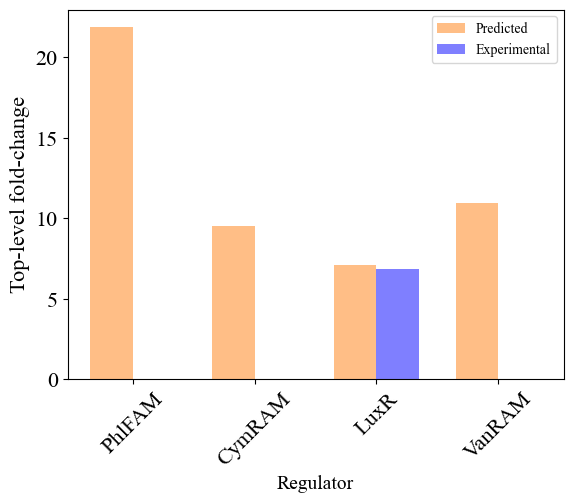

In [101]:
fig, ax = plt.subplots()
bar_width = 0.35
ax.bar(np.arange(len(list(fold_change.keys()))), fold_change.values(), bar_width, 
       color="C1", alpha=0.5, label="Predicted")
ax.bar(np.arange(len(list(exp_fold_change.keys()))) + bar_width, exp_fold_change.values(), bar_width, 
       color="blue", alpha=0.5, label="Experimental")
ax.set_xlabel("Regulator", fontsize=14)
ax.set_xticks(np.arange(len(fold_change.keys())) + bar_width / 2)
ax.set_xticklabels(list(fold_change.keys()))
ax.set_ylabel("Top-level fold-change", fontsize=16)
plt.xticks(rotation=45, fontsize=16)
plt.legend()
plt.yticks(fontsize=16)
plt.savefig("prediction_fold_change.svg")
plt.show()

In [102]:
print(design_error["VanRAM_off"])

KeyError: 'VanRAM_off'